## Clustering Summary

### 병합 군집
<pre>
(1) 각 포인트를 하나의 클러스터로 지정한다.
(2) 어떤 종료 조건(클러스터 개수)을 만족할 때가지 비슷한 두 클러스터를 합쳐나간다.
(3) linkage 옵션에서 가장 비슷한 클러스터를 측정하는 방법을 지정한다.
</pre>

### 병합군집에서의 예측
<pre>
(1) 병합 군집은 predict 메서드가 없다.
(2) 훈련 세트 모델을 만들고 클러스터 소속 정보를 얻기 위해 fit_predict 메서드 사용한다.
(3) sklearn.cluster.AgglomerativeClustering 클래스 사용
</pre>

### scikit-learn 옵션
<pre>
ward  : 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합친다. (대부분 이를 사용)
average : 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합친다.
complete : 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합친다.
</pre>

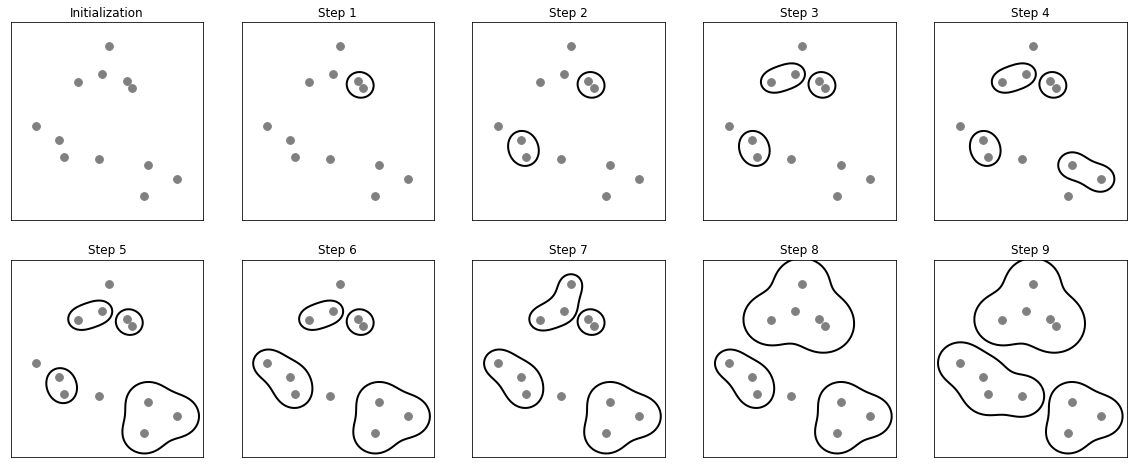

In [2]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
mglearn.plots.plot_agglomerative_algorithm()